In [174]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import os
import re


In [175]:
# Updated file paths
filepaths = {
    'candidates_ge14': '/Users/alex/Downloads/CS-DS Technical Assessment_New/data/candidates_ge14.csv',
    'results_parlimen_ge14': '/Users/alex/Downloads/CS-DS Technical Assessment_New/data/results_parlimen_ge14.csv',
    'candidates_ge15': '/Users/alex/Downloads/CS-DS Technical Assessment_New/data/candidates_ge15.csv',
    'results_parlimen_ge15': '/Users/alex/Downloads/CS-DS Technical Assessment_New/data/results_parlimen_ge15.csv'
}


In [176]:
# Load all CSV files into DataFrames
try:
    df_candidates_ge14 = pd.read_csv(filepaths['candidates_ge14'])
    df_results_parlimen_ge14 = pd.read_csv(filepaths['results_parlimen_ge14'])
    df_candidates_ge15 = pd.read_csv(filepaths['candidates_ge15'])
    df_results_parlimen_ge15 = pd.read_csv(filepaths['results_parlimen_ge15'])
    
    # Return the first few rows of each dataframe to confirm successful loading
    dfs_head = {
        'candidates_ge14_head': df_candidates_ge14.head(),
        'results_parlimen_ge14_head': df_results_parlimen_ge14.head(),
        'candidates_ge15_head': df_candidates_ge15.head(),
        'results_parlimen_ge15_head': df_results_parlimen_ge15.head()
    }
except Exception as e:
    # In case of an error, return the error message.
    dfs_head = str(e)

dfs_head 


{'candidates_ge14_head':     state            parlimen  ballot_order                      name  age  \
 0  Perlis  P.001 Padang Besar             1        IZIZAM BIN IBRAHIM   41   
 1  Perlis  P.001 Padang Besar             2  ZAHIDI BIN ZAINUL ABIDIN   57   
 2  Perlis  P.001 Padang Besar             3             MOKHTAR SENIK   53   
 3  Perlis        P.002 Kangar             1                AMIN AHMAD   36   
 4  Perlis        P.002 Kangar             2             RAMLI SHARIFF   57   
 
     sex   ethnicity                          party  votes  result result_desc  
 0  male  bumiputera    PARTI KEADILAN RAKYAT (PKR)  13594       0        lost  
 1  male  bumiputera          BARISAN NASIONAL (BN)  15032       1         won  
 2  male  bumiputera  PARTI ISLAM SE MALAYSIA (PAS)   7874       0        lost  
 3  male  bumiputera    PARTI KEADILAN RAKYAT (PKR)  20909       1         won  
 4  male  bumiputera          BARISAN NASIONAL (BN)  15306       0        lost  ,
 'results_par

In [177]:
# Merging the candidate and results dataframes for both GE14 and GE15 into one dataframe each
df_ge14 = pd.merge(df_candidates_ge14, df_results_parlimen_ge14, on=['state', 'parlimen'], how='outer')
df_ge15 = pd.merge(df_candidates_ge15, df_results_parlimen_ge15, on=['state', 'parlimen'], how='outer')

# Combining the merged dataframes into one for all general election data
df_all_elections = pd.concat([df_ge14.assign(election='GE14'), df_ge15.assign(election='GE15')], ignore_index=True)

# Check for null values across the combined dataframe
null_check = df_all_elections.isnull().sum()
null_check



state                       0
parlimen                    0
ballot_order                0
name                        0
age                        33
sex                         0
ethnicity                   0
party                       0
votes                       0
result                      0
result_desc                 0
undi_keluar_peti            0
undi_dalam_peti             0
undi_tak_kembali            0
undi_tolak                  0
majoriti                    0
peratus_keluar              0
undi_rosak                  0
pengundi_jumlah             0
pengundi_tidak_hadir        0
rosak_vs_keseluruhan        0
rosak_vs_majoriti           0
tidakhadir_vs_majoriti      0
election                    0
name_display              687
new_mp                    687
dtype: int64

In [178]:
unique_counts = df_all_elections.nunique()
unique_counts


state                       16
parlimen                   222
ballot_order                10
name                      1632
age                         61
sex                          2
ethnicity                    4
party                       38
votes                     1560
result                       2
result_desc                  3
undi_keluar_peti           443
undi_dalam_peti            443
undi_tak_kembali           266
undi_tolak                 368
majoriti                   440
peratus_keluar             353
undi_rosak                 378
pengundi_jumlah            444
pengundi_tidak_hadir       441
rosak_vs_keseluruhan       444
rosak_vs_majoriti          444
tidakhadir_vs_majoriti     444
election                     2
name_display               944
new_mp                       2
dtype: int64

In [ ]:
df_ge14_merged = pd.merge(df_candidates_ge14, df_results_parlimen_ge14, on=['state', 'parlimen'], how='outer')
df_ge15_merged = pd.merge(df_candidates_ge15, df_results_parlimen_ge15, on=['state', 'parlimen'], how='outer')

In [179]:
# Perform a descriptive analysis for an overview of the data

# Concatenate the candidate data for both elections for comparison
df_candidates_combined = pd.concat([df_candidates_ge14.assign(election='GE14'), 
                                    df_candidates_ge15.assign(election='GE15')])

# Perform descriptive analysis on candidate data
desc_candidates = df_candidates_combined.describe(include='all')

# Concatenate the results data for both elections for comparison
df_results_combined = pd.concat([df_results_parlimen_ge14.assign(election='GE14'), 
                                 df_results_parlimen_ge15.assign(election='GE15')])

# Perform descriptive analysis on results data
desc_results = df_results_combined.describe(include='all')

(desc_candidates, desc_results)


(        state    parlimen  ballot_order                name          age  \
 count    1632        1632   1632.000000                1632  1599.000000   
 unique     16         222           NaN                1632          NaN   
 top     Sabah  P.115 Batu           NaN  IZIZAM BIN IBRAHIM          NaN   
 freq      216          14           NaN                   1          NaN   
 mean      NaN         NaN      2.528186                 NaN    51.982489   
 std       NaN         NaN      1.384575                 NaN    10.784715   
 min       NaN         NaN      1.000000                 NaN    22.000000   
 25%       NaN         NaN      1.000000                 NaN    44.000000   
 50%       NaN         NaN      2.000000                 NaN    53.000000   
 75%       NaN         NaN      3.000000                 NaN    60.000000   
 max       NaN         NaN     10.000000                 NaN    96.000000   
 
          sex   ethnicity                  party          votes       resu

In [180]:
# Merge including 'state' and 'parlimen' for alignment
df_ge14_merged = pd.merge(df_candidates_ge14, df_results_parlimen_ge14, on=['state', 'parlimen'], how='inner')
df_ge15_merged = pd.merge(df_candidates_ge15, df_results_parlimen_ge15, on=['state', 'parlimen'], how='inner')

#  Concatenate the merged dataframes and then drop non-numeric columns
df_all_merged = pd.concat([df_ge14_merged, df_ge15_merged], ignore_index=True)
df_all_numeric = df_all_merged.select_dtypes(include=['float64', 'int64'])

# Find the correlation matrix
correlation_matrix = df_all_numeric.corr()


## "Coalition"
Generate a new column which the parties group and form coalition in GE14,15 

Source: Malaysia’ 14th General Election: End of an epoch, and beginning of a new? (2018)

In [181]:
# Print out all the unique values in the 'party' column

unique_parties = df_candidates_ge15['party'].unique()
unique_parties


array(['PERIKATAN NASIONAL (PN)', 'PARTI WARISAN SABAH (WARISAN)',
       'BEBAS (BEBAS)', 'BARISAN NASIONAL (BN)', 'PAKATAN HARAPAN (PH)',
       'PARTI PEJUANG TANAHAIR (PEJUANG)', 'PARTI RAKYAT MALAYSIA (PRM)',
       'PARTI ISLAM SE MALAYSIA (PAS)',
       'PARTI BUMIPUTERA PERKASA MALAYSIA (PUTRA)',
       'IKATAN DEMOKRATIK MALAYSIA (MUDA)', 'PARTI BANGSA MALAYSIA (PBM)',
       'PARTI UTAMA RAKYAT (PUR)', 'PARTI SOSIALIS MALAYSIA (PSM)',
       'PARTI GABUNGAN RAKYAT SABAH (GRS)',
       'PARTI KESEJAHTERAAN DEMOKRATIK MASYARAKAT (KDM)',
       'PARTI BERSATU RAKYAT SABAH (PBRS)',
       'PARTI PERPADUAN RAKYAT SABAH (PPRS)',
       'PARTI BUMI KENYALANG (PBK)', 'GABUNGAN PARTI SARAWAK (GPS)',
       'PARTI TINDAKAN DEMOKRATIK (DAP)',
       'PARTI SEDAR RAKYAT SARAWAK (SEDAR)',
       'PARTI SARAWAK BERSATU (PSB)', 'PARTI BANSA DAYAK SARAWAK (PBDS)'],
      dtype=object)

In [182]:
# GE 15 candidates already map the coalition to its party
coalition_mapping = {
    # Barisan Nasional (BN)
    'UMNO': 'BN',
    'MCA': 'BN',
    'MIC': 'BN',
    'PBRS': 'BN',
    'BN':'BN',
    # Pakatan Harapan (PH)
    'PH': 'PH',
    'PKR': 'PH',
    'DAP': 'PH',
    'AMANAH': 'PH',
    'UPKO': 'PH',
    # Perikatan Nasional (PN)
    'PN':'PN',
    'BERSATU': 'PN',
    'PAS': 'PN',
    'GERAKAN': 'PN',
    'STAR': 'PN',
    'SAPP': 'PN',
    # Gerakan Tanah Air (GTA)
    'PEJUANG': 'GTA',
    'BERJASA': 'GTA',
    'PUTRA': 'GTA',
    'IMAN': 'GTA'
}


# Apply this function to the 'party' column to create a new column for the abbreviation
df_candidates_ge15['party_abbreviation'] = df_candidates_ge15['party'].apply(extract_abbreviation)

# Now use the coalition_mapping to map the abbreviation to the coalition
df_candidates_ge15['coalitions'] = df_candidates_ge15['party_abbreviation'].map(coalition_mapping).fillna('Others')

print(df_candidates_ge15[['party', 'coalitions']])

                                               party coalitions
0                            PERIKATAN NASIONAL (PN)         PN
1                      PARTI WARISAN SABAH (WARISAN)     Others
2                                      BEBAS (BEBAS)     Others
3                              BARISAN NASIONAL (BN)         BN
4                               PAKATAN HARAPAN (PH)         PH
5                            PERIKATAN NASIONAL (PN)         PN
6                              BARISAN NASIONAL (BN)         BN
7                      PARTI WARISAN SABAH (WARISAN)     Others
8                               PAKATAN HARAPAN (PH)         PH
9                   PARTI PEJUANG TANAHAIR (PEJUANG)        GTA
10                              PAKATAN HARAPAN (PH)         PH
11                           PERIKATAN NASIONAL (PN)         PN
12                             BARISAN NASIONAL (BN)         BN
13                                     BEBAS (BEBAS)     Others
14                           PERIKATAN N

In [185]:
# Define the coalition mappings with all parties included
coalition_mapping = {
    'PKR': 'PH',  # Parti Keadilan Rakyat
    'DAP': 'PH',  # Democratic Action Party
    'AMANAH': 'PH',  # Parti Amanah Negara
    'BERSATU': 'PH',  # Parti Pribumi Bersatu Malaysia
    'BN':'BN',
    'UMNO': 'BN',  # United Malays National Organization
    'MCA': 'BN',  # Malaysian Chinese Association
    'MIC': 'BN',  # Malaysian Indian Congress
    'GERAKAN': 'BN',  # Parti Gerakan Rakyat Malaysia
    'PBRS': 'BN',  # Parti Bersatu Rakyat Sabah
    'PBS': 'BN',  # Parti Bersatu Sabah
    'UPKO': 'BN',  # United Pasokmomogun Kadazandusun Murut Organisation
    'PRS': 'BN',  # Parti Rakyat Sarawak
    'SUPP': 'BN',  # Sarawak United People's Party
    'LDP': 'BN',  # Liberal Democratic Party
    'PAS': 'Gagasan Sejahtera',  # Parti Islam Se-Malaysia
    'IKATAN': 'Gagasan Sejahtera',  # Parti Ikatan Bangsa Malaysia
    'BERJASA': 'Gagasan Sejahtera',  # Barisan Jemaah Islamiah Se-Malaysia
    'WARISAN': 'WARISAN',  # Parti Warisan Sabah
    'PBS (Sabah Alliance)': 'Sabah Alliance',  # United Sabah Party
    'STAR': 'Sabah Alliance',  # Parti Solidariti Tanah Airku
    'PSM': 'Others',  # Parti Sosialis Malaysia
    'MAP': 'Others',  # Malaysian Advancement Party
    'PBM': 'Others',  # Parti Bangsa Malaysia
    'PEKIRA': 'Others',  # Parti Kerjasama Rakyat
    'AMANAH (Sarawak)': 'Others',  # Parti Amanah Kebangsaan Sarawak
    'PBK': 'Others',  # Parti Bumi Kenyalang
    'PPRS': 'Others',  # Parti Perpaduan Rakyat Sabah
    'KITA': 'Others',  # Parti Kesejahteraan Insan Tanah Air
    'PBDS Baru': 'Others',  # Parti Bansa Dayak Sarawak Baru
    'PHRS': 'Others',  # Parti Harapan Rakyat Sabah
    'PUTRA': 'Others',  # Parti Kebangsaan Melayu Malaya
    # Add any other parties not listed here
}

# Function to extract abbreviation from party name
def extract_abbreviation(party_name):
    match = re.search(r'\((.*?)\)', party_name)
    return match.group(1) if match else party_name

# Apply this function to the 'party' column to create a new column for the abbreviation
df_candidates_ge14['party_abbreviation'] = df_candidates_ge14['party'].apply(extract_abbreviation)

# Now use the coalition_mapping to map the abbreviation to the coalition
df_candidates_ge14['coalitions'] = df_candidates_ge14['party_abbreviation'].map(coalition_mapping).fillna('Others')

# checking the respective coalition
print(df_candidates_ge14[['party', 'coalitions']])



                                             party         coalitions
0                      PARTI KEADILAN RAKYAT (PKR)                 PH
1                            BARISAN NASIONAL (BN)                 BN
2                    PARTI ISLAM SE MALAYSIA (PAS)  Gagasan Sejahtera
3                      PARTI KEADILAN RAKYAT (PKR)                 PH
4                            BARISAN NASIONAL (BN)                 BN
5                    PARTI ISLAM SE MALAYSIA (PAS)  Gagasan Sejahtera
6                    PARTI ISLAM SE MALAYSIA (PAS)  Gagasan Sejahtera
7                      PARTI KEADILAN RAKYAT (PKR)                 PH
8                            BARISAN NASIONAL (BN)                 BN
9                    PARTI ISLAM SE MALAYSIA (PAS)  Gagasan Sejahtera
10                     PARTI KEADILAN RAKYAT (PKR)                 PH
11                           BARISAN NASIONAL (BN)                 BN
12                   PARTI ISLAM SE MALAYSIA (PAS)  Gagasan Sejahtera
13                  

In [183]:
# Drop the column
df_candidates_ge15.drop('name_display',axis=1, inplace=True)


In [184]:
pd.set_option('display.max_rows', None)  # Or set to a large number to display many rows
pd.set_option('display.max_columns', None)  # Or set to a large number to display many columns
pd.set_option('display.width', None)  # Or set to a large number to avoid wrapping
pd.set_option('display.max_colwidth', None)  # To display the full content of each column


In [186]:
print(df_candidates_ge14.shape)
print(df_candidates_ge15.shape)
print(df_candidates_ge14.columns)
print(df_ge15_merged.columns)
# Count the number of unique values in the 'coalitions' column
# Unique coalitions and parties in GE14
unique_coalitions_parties_ge14 = df_candidates_ge14.groupby('coalitions')['party'].unique()

# Unique coalitions and parties in GE15
unique_coalitions_parties_ge15 = df_candidates_ge15.groupby('coalitions')['party'].unique()

# Print the unique coalitions and their parties for GE14
print("GE14 Unique Coalitions and Parties:")
print(unique_coalitions_parties_ge14)

# Print the unique coalitions and their parties for GE15
print("\nGE15 Unique Coalitions and Parties:")
print(unique_coalitions_parties_ge15)



(687, 13)
(945, 14)
Index(['state', 'parlimen', 'ballot_order', 'name', 'age', 'sex', 'ethnicity',
       'party', 'votes', 'result', 'result_desc', 'party_abbreviation',
       'coalitions'],
      dtype='object')
Index(['state', 'parlimen', 'ballot_order', 'name', 'name_display', 'age',
       'sex', 'ethnicity', 'party', 'votes', 'result', 'result_desc', 'new_mp',
       'undi_keluar_peti', 'undi_dalam_peti', 'undi_tak_kembali', 'undi_tolak',
       'majoriti', 'peratus_keluar', 'undi_rosak', 'pengundi_jumlah',
       'pengundi_tidak_hadir', 'rosak_vs_keseluruhan', 'rosak_vs_majoriti',
       'tidakhadir_vs_majoriti'],
      dtype='object')
GE14 Unique Coalitions and Parties:
coalitions
BN                                                                                                                                                                                                                                                                                                           

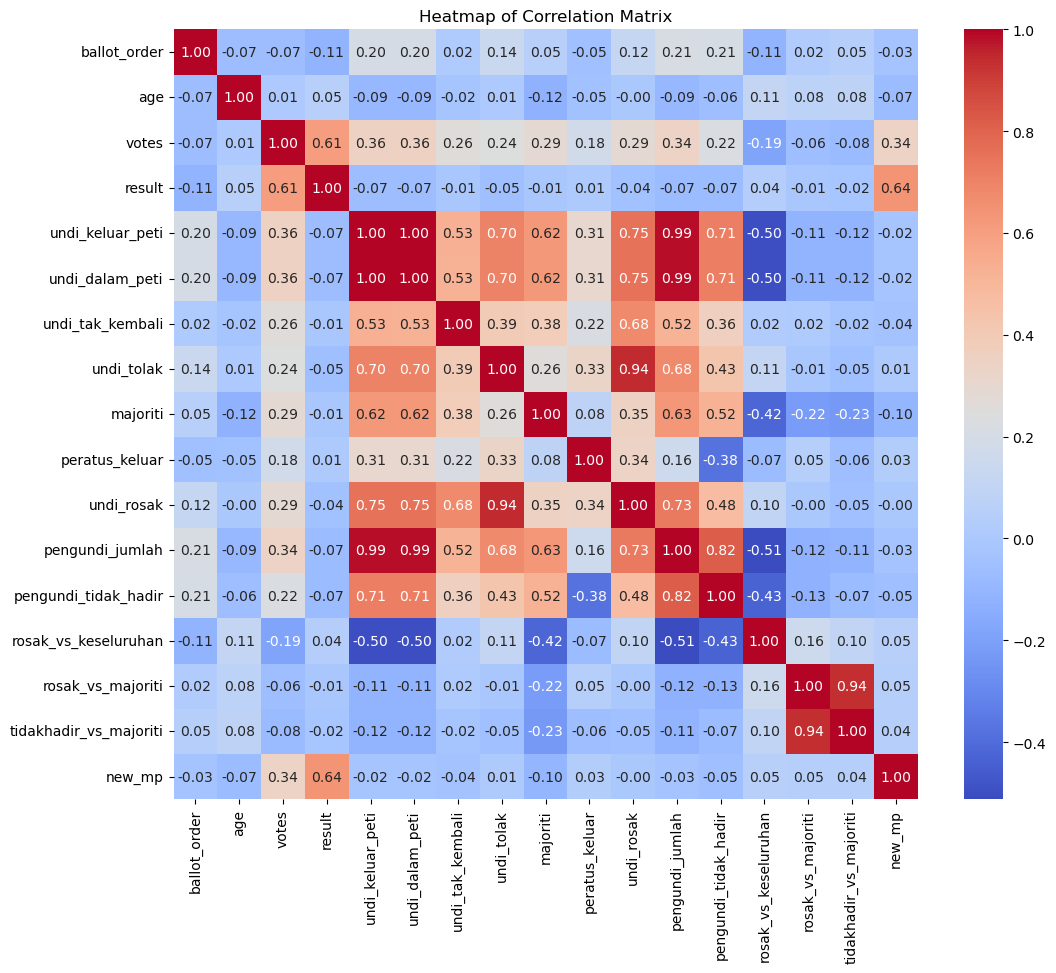

In [ ]:
# Plot a heatmap to see the correlation between attributes
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

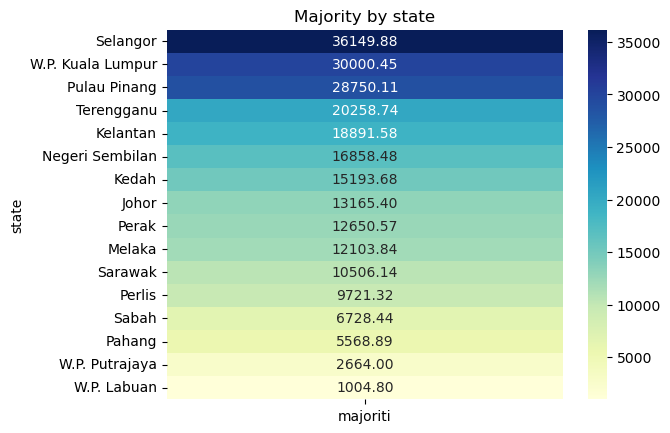

In [190]:
df_pivot = df_all_merged.pivot_table(values='majoriti', index='state').sort_values(by='majoriti',ascending=False)
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title("Majority by state")
plt.show()

According to Lichtman (2020), scandal take significant role when predicting the election result.
We will exploit the indicator based on our case.

The 1MDB scandal significantly damaged Najib Razak's reputation and the credibility of his government 
due to the alleged misappropriation of billions of dollars from the state-owned investment fund. 

We will explore how the event significantly damage the votes toward its party, BN.
https://www.bbc.com/zhongwen/simp/world-54171379

In [ ]:
# Filter the DataFrame for rows where 'result' is 1
wins_df_14 = df_ge14_merged[df_ge14_merged['result'] == 1]
wins_df_15 = df_ge15_merged[df_ge15_merged['result'] == 1]

# Count the number of wins for each coalition
win_count_by_coalition_14 = wins_df_14.groupby('coalitions')['result'].count()
win_count_by_coalition_15 = wins_df_15.groupby('coalitions')['result'].count()

# Print the count of wins for each coalition
print(win_count_by_coalition_14)
print(win_count_by_coalition_15)

coalitions
BN                    79
Gagasan Sejahtera     18
Others                 4
PH                   113
WARISAN                8
Name: result, dtype: int64
coalitions
BN        30
Others    37
PH        81
PN        74
Name: result, dtype: int64


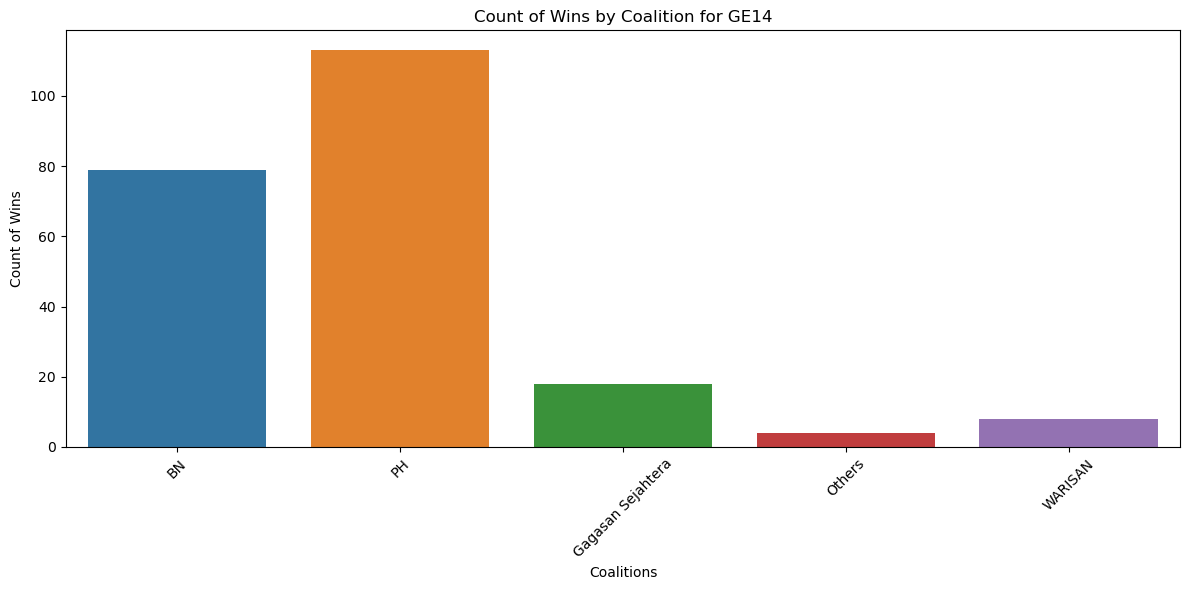

In [ ]:
# Filter the DataFrame for rows where 'result' is 1
wins_df = df_ge14_merged[df_ge14_merged['result'] == 1]

# Create a count plot to show the number of wins by each coalition
plt.figure(figsize=(12, 6))
sns.countplot(x='coalitions', data=wins_df)
plt.title('Count of Wins by Coalition for GE14')
plt.xlabel('Coalitions')
plt.ylabel('Count of Wins')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout if necessary
plt.show()

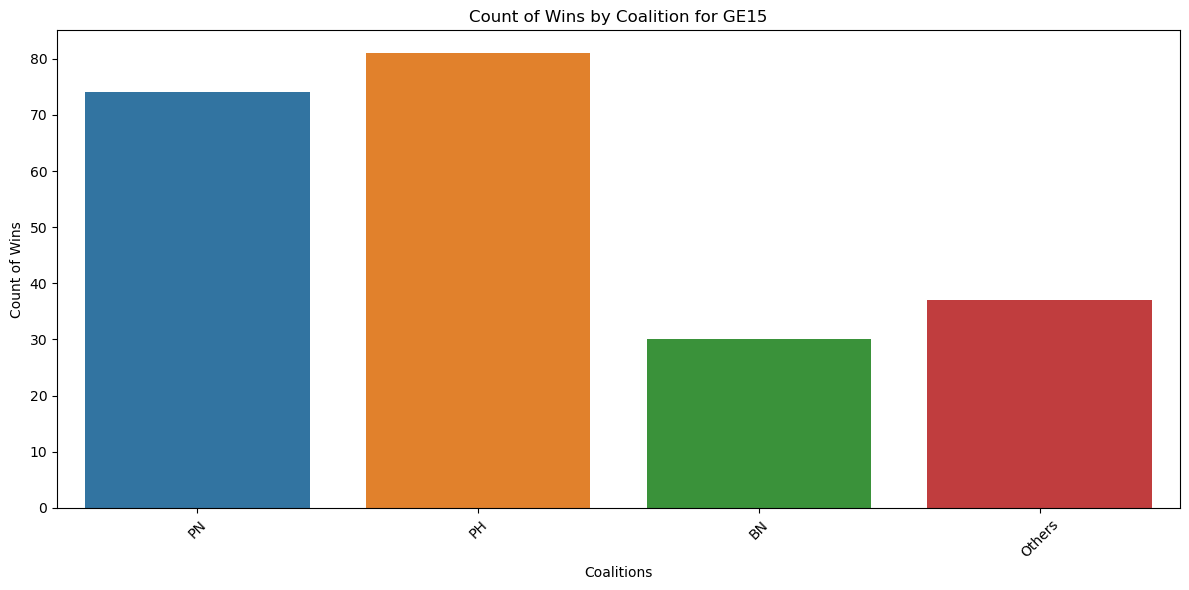

In [ ]:
# Filter the DataFrame for rows where 'result' is 1
wins_df = df_ge15_merged[df_ge15_merged['result'] == 1]

# Create a count plot to show the number of wins by each coalition
plt.figure(figsize=(12, 6))
sns.countplot(x='coalitions', data=wins_df)
plt.title('Count of Wins by Coalition for GE15')
plt.xlabel('Coalitions')
plt.ylabel('Count of Wins')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout if necessary
plt.show()

Voter turnout is an essential metric to measure the level of engagement and participation of citizens in the democratic process. 
It reflects the level of political awareness and interest among the citizens, and a high voter turnout is considered an indicator of a healthy democracy. This, was particularly important this year with the influx of voters aged 18 and above.



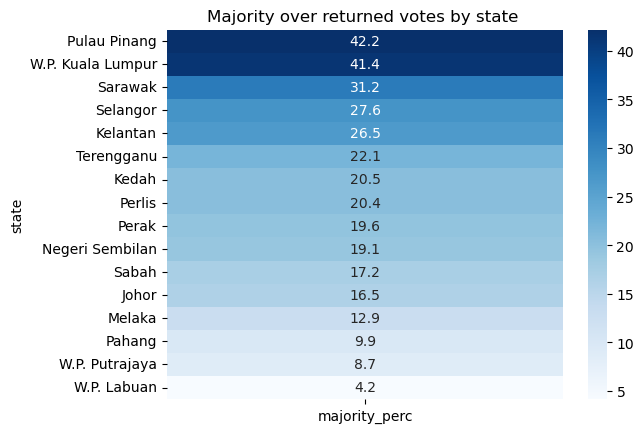

In [191]:
df_all_merged['majority_perc'] = df_all_merged['majoriti']/df_all_merged['undi_dalam_peti']*100
df_pivot_perc = df_all_merged.pivot_table(values='majority_perc', index='state').sort_values(by='majority_perc',ascending=False)
sns.heatmap(df_pivot_perc, cmap='Blues', annot=True, fmt='.1f')
plt.title("Majority over returned votes by state ")
plt.show()


In [192]:
voters_turnout_ge14 = 100- (df_ge14_merged['pengundi_tidak_hadir'].sum() / df_ge14_merged['pengundi_jumlah'].sum()) * 100
print("Voter turnout in GE14: {:.2f}% ".format(voters_turnout_ge14))

voters_turnout_ge15 = 100- (df_ge15_merged['pengundi_tidak_hadir'].sum() / df_ge15_merged['pengundi_jumlah'].sum()) * 100
print("Voter turnout in GE15: {:.2f}% ".format(voters_turnout_ge15))

Voter turnout in GE14: 82.47% 
Voter turnout in GE15: 75.40% 


Voter turnout by state GE14


,parlimen,pengundi_jumlah,pengundi_tidak_hadir,percentage_pengundi_hadir
state,,,,
Johor,P.140 Segamat,5268284,814528,84.539026
Kedah,P.004 Langkawi,3626626,597478,83.525238
Kelantan,P.019 Tumpat,3219437,641571,80.071950
Melaka,P.134 Masjid Tanah,1484010,223107,84.965937
Negeri Sembilan,P.126 Jelebu,1926343,319591,83.409445
Pahang,P.078 Cameron Highlands,2775689,498845,82.028066
Perak,P.054 Gerik,4411377,863057,80.435655
Perlis,P.001 Padang Besar,450687,79983,82.253094
Pulau Pinang,P.041 Kepala Batas,2999603,460266,84.655769


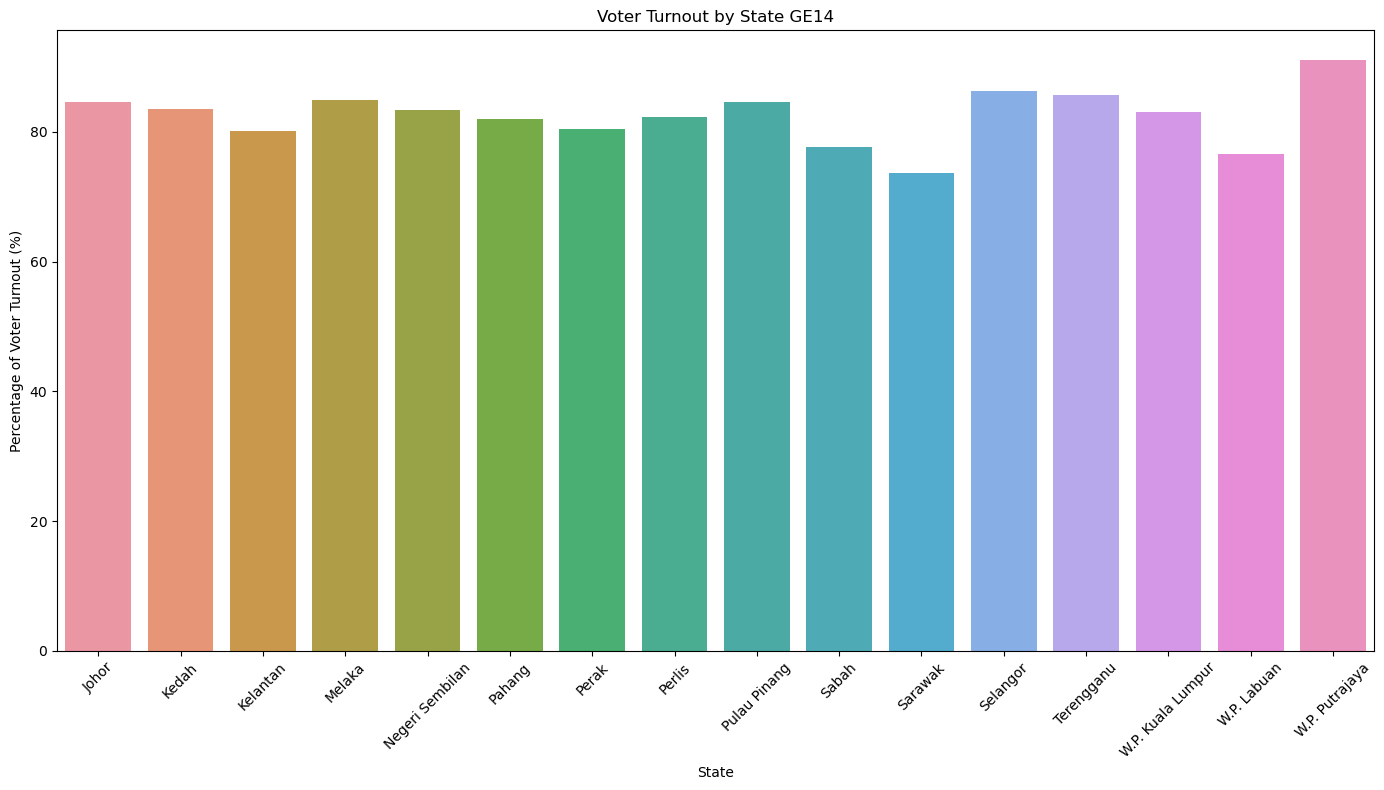

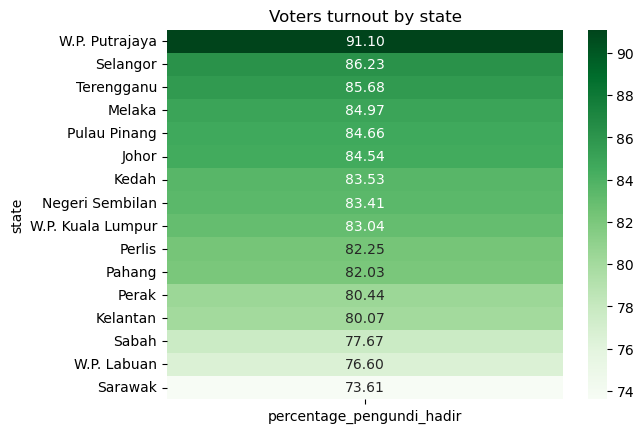

In [202]:
df_state_table = df_ge14_merged.pivot_table(values=["pengundi_tidak_hadir","pengundi_jumlah","parlimen"], index='state',aggfunc={'pengundi_tidak_hadir': sum, 'pengundi_jumlah': sum,'parlimen':'first'})
df_state_table["percentage_pengundi_hadir"] = 100 - (df_state_table["pengundi_tidak_hadir"] / df_state_table["pengundi_jumlah"] * 100)
print("Voter turnout by state GE14")
display(df_state_table)



# Plot the percentage of voter turnout by state
plt.figure(figsize=(14, 8))
sns.barplot(x=df_state_table.index, y=df_state_table["percentage_pengundi_hadir"])
plt.title('Voter Turnout by State GE14')
plt.xlabel('State')
plt.ylabel('Percentage of Voter Turnout (%)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout if necessary
plt.show()

df_state_table.reset_index(inplace=True)
df_state_heatmap = df_state_table[['state', 'percentage_pengundi_hadir']].sort_values(by='percentage_pengundi_hadir',ascending=False)
df_state_heatmap = df_state_heatmap.set_index('state')
sns.heatmap(df_state_heatmap, cmap='Greens', annot=True, fmt='.2f')
plt.title("Voters turnout by state")
plt.show()

Voter turnout by state GE15


,parlimen,pengundi_jumlah,pengundi_tidak_hadir,percentage_pengundi_hadir
state,,,,
Johor,P.140 Segamat,9605819,2355143,75.482122
Kedah,P.004 Langkawi,7326378,1678791,77.085662
Kelantan,P.019 Tumpat,6421518,1826414,71.557909
Melaka,P.134 Masjid Tanah,2745294,568586,79.288703
Negeri Sembilan,P.126 Jelebu,3706060,789142,78.706713
Pahang,P.078 Cameron Highlands,4543537,1001302,77.962059
Perak,P.054 Gerik,8550891,2213628,74.112312
Perlis,P.001 Padang Besar,857883,199936,76.694258
Pulau Pinang,P.041 Kepala Batas,5465735,1203444,77.982028


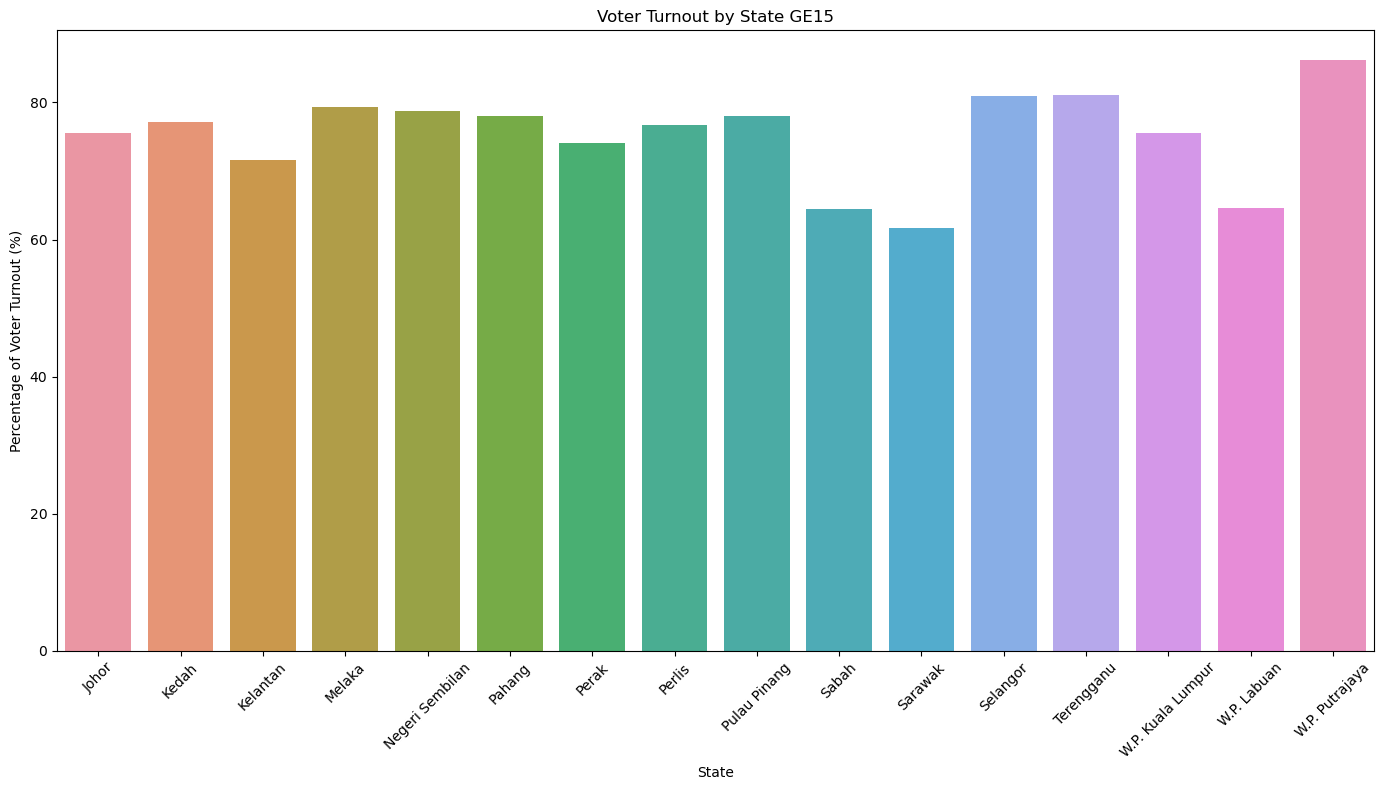

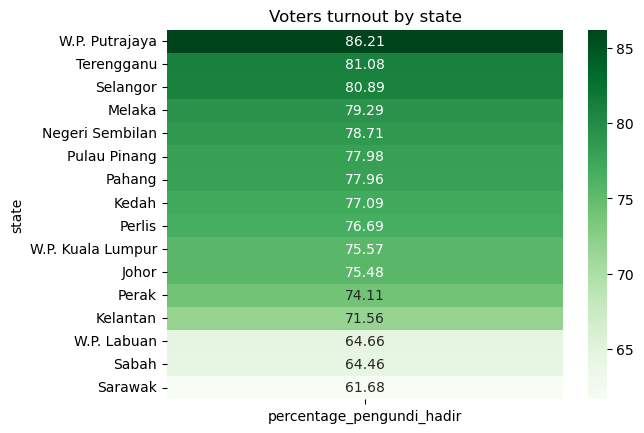

In [194]:
df_state_table = df_ge15_merged.pivot_table(values=["pengundi_tidak_hadir","pengundi_jumlah","parlimen"], index='state',aggfunc={'pengundi_tidak_hadir': sum, 'pengundi_jumlah': sum,'parlimen':'first'})
df_state_table["percentage_pengundi_hadir"] = 100 - (df_state_table["pengundi_tidak_hadir"] / df_state_table["pengundi_jumlah"] * 100)
print("Voter turnout by state GE15")
display(df_state_table)

# Plot the percentage of voter turnout by state
plt.figure(figsize=(14, 8))
sns.barplot(x=df_state_table.index, y=df_state_table["percentage_pengundi_hadir"])
plt.title('Voter Turnout by State GE15')
plt.xlabel('State')
plt.ylabel('Percentage of Voter Turnout (%)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout if necessary
plt.show()

df_state_table.reset_index(inplace=True)
df_state_heatmap = df_state_table[['state', 'percentage_pengundi_hadir']].sort_values(by='percentage_pengundi_hadir',ascending=False)
df_state_heatmap = df_state_heatmap.set_index('state')
sns.heatmap(df_state_heatmap, cmap='Greens', annot=True, fmt='.2f')
plt.title("Voters turnout by state")
plt.show()

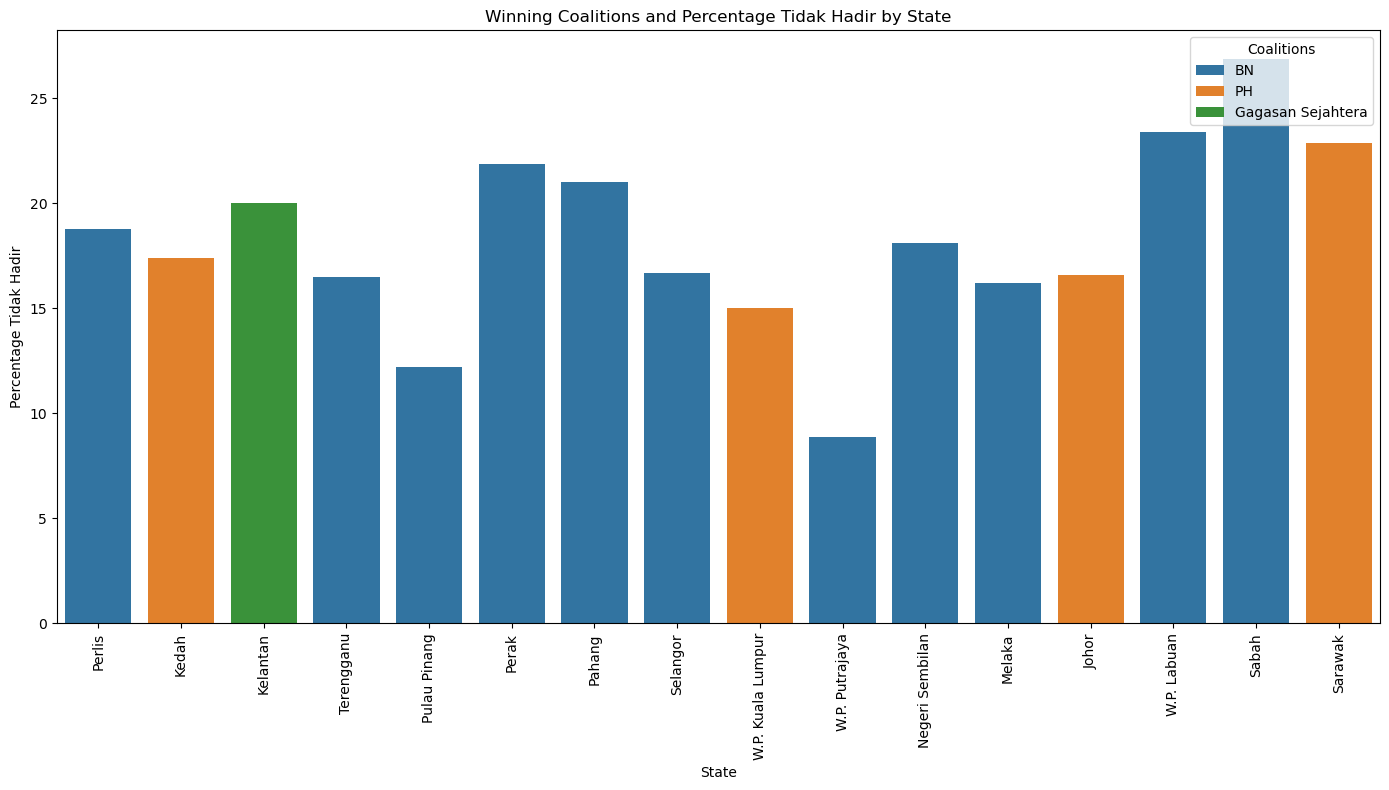

In [207]:
# Calculate the percentage of 'tidakhadir'
df_ge14_merged['percentage_tidakhadir'] = df_ge14_merged['pengundi_tidak_hadir'] / df_ge14_merged['pengundi_jumlah'] * 100
# Filter the DataFrame for rows where 'result' is 1 (indicating a win)
winning_coalitions = df_ge14_merged[df_ge14_merged['result'] == 1]

# Since we want to see which coalition has won in each state, we'll take the first (or any) winning entry per state
# We can achieve this by dropping duplicates, keeping the first occurrence of each state
winning_coalitions_by_state = winning_coalitions.drop_duplicates(subset=['state'])

# Now, create a bar plot to show 'percentage_tidakhadir' for the winning coalitions by state
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='percentage_tidakhadir', hue='coalitions', data=winning_coalitions_by_state, dodge=False)
plt.title('Winning Coalitions and Percentage Tidak Hadir by State')
plt.xlabel('State')
plt.ylabel('Percentage Tidak Hadir')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.legend(title='Coalitions', loc='upper right')
plt.tight_layout()  # Adjust layout if necessary
plt.show()



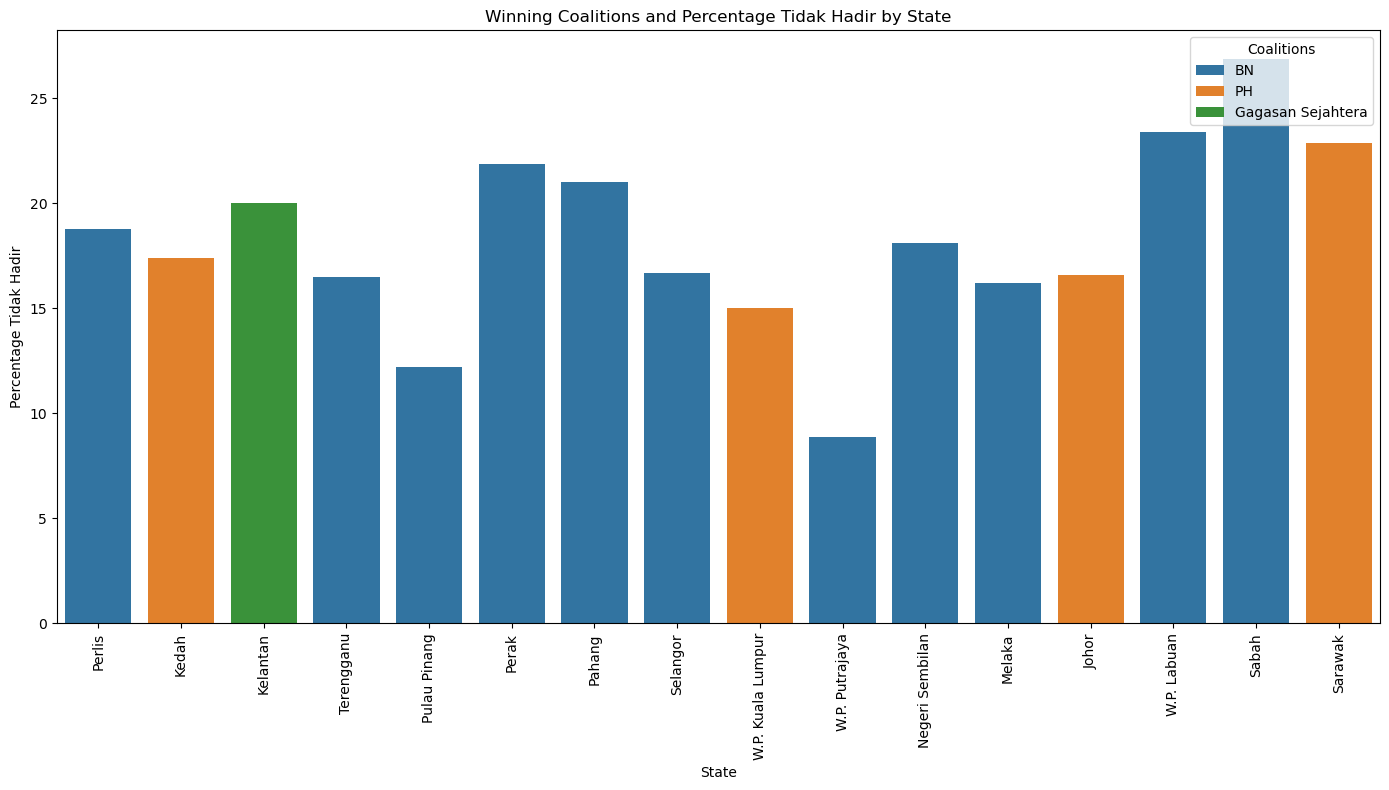

In [208]:
# Calculate the percentage of 'tidakhadir'
df_ge14_merged['percentage_tidakhadir'] = df_ge14_merged['pengundi_tidak_hadir'] / df_ge14_merged['pengundi_jumlah'] * 100
# Filter the DataFrame for rows where 'result' is 1 (indicating a win)
winning_coalitions = df_ge14_merged[df_ge14_merged['result'] == 1]

# Since we want to see which coalition has won in each state, we'll take the first (or any) winning entry per state
# We can achieve this by dropping duplicates, keeping the first occurrence of each state
winning_coalitions_by_state = winning_coalitions.drop_duplicates(subset=['state'])

# Now, create a bar plot to show 'percentage_tidakhadir' for the winning coalitions by state
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='percentage_tidakhadir', hue='coalitions', data=winning_coalitions_by_state, dodge=False)
plt.title('Winning Coalitions and Percentage Tidak Hadir by State')
plt.xlabel('State')
plt.ylabel('Percentage Tidak Hadir')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.legend(title='Coalitions', loc='upper right')
plt.tight_layout()  # Adjust layout if necessary
plt.show()

